In [1]:
pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
  Using cached grpcio-1.67.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.3703 - loss: 1.3529

C:\Users\ADITYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 63s 678ms/step - accuracy: 0.3711 - loss: 1.3517 - val_accuracy: 0.3173 - val_loss: 2.0629
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 368ms/step - accuracy: 0.4935 - loss: 1.1199 - val_accuracy: 0.2995 - val_loss: 1.9831
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 362ms/step - accuracy: 0.5893 - loss: 0.9753 - val_accuracy: 0.3249 - val_loss: 2.3671
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 359ms/step - accuracy: 0.6177 - loss: 0.8645 - val_accuracy: 0.3731 - val_loss: 2.5717
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 366ms/step - accuracy: 0.6437 - loss: 0.8021 - val_accuracy: 0.3909 - val_loss: 2.9524
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 355ms/step - accuracy: 0.6648 - loss: 0.7546 - val_accuracy: 0.3629 - val_loss: 2.8787
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 32s 359ms/step - accuracy: 0.6857 - loss: 0.7274 - val_accuracy: 0.3832 - val_loss: 2.6635
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 33s 364ms/step - accuracy: 0.6846 - loss: 0.7223 - val_accuracy: 0.347

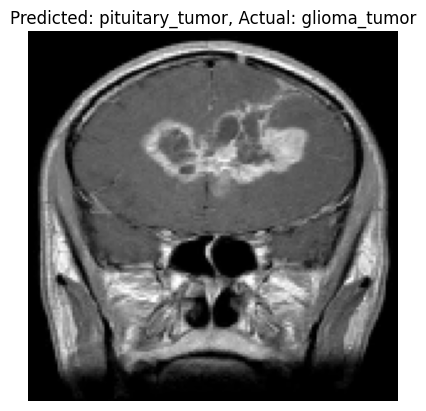

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Set paths for training and testing directories
train_dir = r"E:\7 Brain_Tumor-20241106T030908Z-001\Training"
test_dir = r"E:\7 Brain_Tumor-20241106T030908Z-001\Testing"

# Image data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if only two classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',  # Use 'binary' if only two classes
    shuffle=False
)

# Build CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Change based on classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Test prediction and display an example
class_labels = list(train_generator.class_indices.keys())
sample_image, sample_label = next(test_generator)  # Use next() to get a batch
prediction = model.predict(sample_image)
predicted_class = class_labels[np.argmax(prediction[0])]
actual_class = class_labels[np.argmax(sample_label[0])]

# Display the image with prediction and actual label
plt.imshow(sample_image[0])
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.3299 - loss: 7.2295 - val_accuracy: 0.3350 - val_loss: 5.1300 - learning_rate: 1.0000e-04
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 405s 5s/step - accuracy: 0.4296 - loss: 4.7219 - val_accuracy: 0.3477 - val_loss: 4.0731 - learning_rate: 1.0000e-04
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 442s 5s/step - accuracy: 0.4677 - loss: 3.8150 - val_accuracy: 0.3756 - val_loss: 3.5546 - learning_rate: 1.0000e-04
394/394 ━━━━━━━━━━━━━━━━━━━━ 80s 204ms/step - accuracy: 0.2013 - loss: 3.8109
Test Loss: 3.5546, Test Accuracy: 0.3756
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step


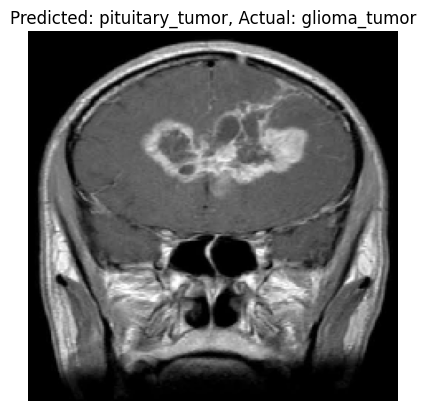

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

# Set paths for training and testing directories
train_dir = r"E:\7 Brain_Tumor-20241106T030908Z-001\Training"
test_dir = r"E:\7 Brain_Tumor-20241106T030908Z-001\Testing"

# Image data generators with enhanced augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Increased image size for VGG16 compatibility
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Load VGG16 model for transfer learning, excluding the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model with additional classification layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model with a lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Set callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=3,
    validation_data=test_generator,
    callbacks=callbacks
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Test prediction and display an example
class_labels = list(train_generator.class_indices.keys())
sample_image, sample_label = next(test_generator)
prediction = model.predict(sample_image)
predicted_class = class_labels[np.argmax(prediction[0])]
actual_class = class_labels[np.argmax(sample_label[0])]

# Display the image with prediction and actual label
plt.imshow(sample_image[0])
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()